In [1]:
import numpy as np

# Definição da classe Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Taxa de aprendizado
        self.lr = learning_rate
        # Número de épocas (iterações sobre o conjunto de dados)
        self.epochs = epochs
        # Função de ativação: aqui usamos a função degrau unitária
        self.activation_func = self._unit_step_func
        # Inicialização dos pesos (serão definidos no método fit)
        self.weights = None

    def fit(self, X, y):
        # Obtém o número de amostras e de características
        n_samples, n_features = X.shape

        # Adiciona uma coluna de 1s a X para representar o bias (viés)
        X_ = np.c_[ np.ones( X.shape[0] ), X ]

        # Garante que os rótulos estejam no formato 0 ou 1
        y_ = np.array( [ 1 if y_ > 0 else 0 for y_ in y ] )

        # Inicializa os pesos com zeros, incluindo o peso do bias
        self.weights = np.zeros( X_.shape[1] )

        # Loop principal de treinamento, repetido por 'epochs'
        for _ in range( self.epochs ):
            # Itera sobre cada amostra do conjunto de treinamento
            for idx, x_i in enumerate( X_ ):
                # Calcula a saída linear (produto escalar dos pesos com as entradas)
                linear_output = np.dot( x_i, self.weights )
                # Aplica a função de ativação para obter a saída binária (0 ou 1)
                y_predicted = self.activation_func( linear_output )

                # Calcula a atualização do peso com base no erro
                update = self.lr * ( y_[idx] - y_predicted )

                # Atualiza os pesos proporcionalmente ao erro
                self.weights += update * x_i

    def predict(self, X):
        # Adiciona a coluna do bias ao conjunto de dados de entrada
        X_ = np.c_[ np.ones( X.shape[0] ), X ]

        # Calcula a saída linear
        linear_output = np.dot( X_, self.weights )
        # Aplica a função de ativação para obter a previsão (0 ou 1)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # Função de ativação: degrau unitário
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

(200, 2) [[ 6.95754923e-01 -3.73669598e+00]
 [-1.76171349e-03 -1.11708690e+01]
 [-1.23421034e+00 -6.75714395e-01]
 [-3.08346032e+00 -8.47564228e+00]
 [-1.91873998e+00 -9.60807566e+00]
 [ 2.01294429e+00 -3.59598556e-01]
 [-3.41432823e+00 -7.88659712e+00]
 [-5.08063896e-01  1.33360546e+00]
 [ 1.87913559e+00 -2.49748259e+00]
 [-1.24956659e-01 -3.42101444e+00]
 [-1.33513619e+00  3.24602117e+00]
 [-8.00107089e-01 -3.30423939e+00]
 [-1.81549094e+00 -2.44217719e+00]
 [-9.54426758e-01 -1.06072307e+01]
 [ 1.98214979e-01 -1.13295293e+01]
 [ 3.05564304e+00 -1.19858699e+01]
 [ 3.46023839e+00 -3.10392954e+00]
 [-9.83986286e-02 -1.29383685e+01]
 [ 1.04419826e+00 -7.41106979e+00]
 [ 5.45489827e-01 -2.44506498e+00]
 [-2.40822632e-01 -9.39992536e+00]
 [-3.80029327e+00 -8.04274515e+00]
 [ 4.27961640e+00 -3.11390590e+00]
 [ 3.78450444e+00 -7.63666046e-01]
 [-4.33603705e-01 -9.26641827e+00]
 [-4.25426295e-01 -2.98838362e+00]
 [ 3.61667046e-01  4.08009000e+00]
 [ 6.27664334e-01 -3.12110071e+00]
 [-6.309293

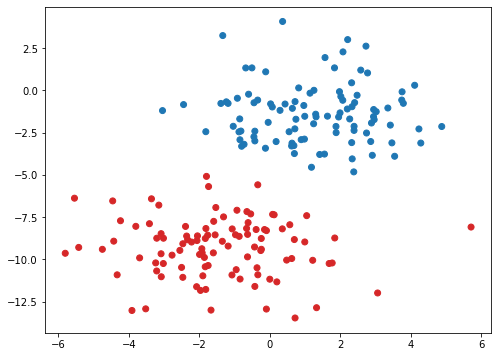

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Dataset
X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.70, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print ( X_train.shape, X_train )
print ( y_train.shape, y_train )

def plot_data( X, y ):
    plt.scatter( X[:, 0], X[:, 1], marker="o", c=np.where( y == 1, 'tab:blue', 'tab:red' ) )
    plt.xlabel( r"" )
    plt.ylabel( r"" )

fig = plt.figure( figsize=(8,6) )
plot_data( X_train, y_train )

In [13]:
# ==== 1. TREINAMENTO DO PERCEPTRON ====
# Instancia o Perceptron com taxa de aprendizado 0.01 e 100 épocas
p = Perceptron(learning_rate=0.01, epochs=100)

# Treina o modelo com os dados de treino
p.fit(X_train, y_train)

# ==== 2. FUNÇÃO PARA CALCULAR ACURÁCIA ====
# Calcula a proporção de acertos
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# ==== 3. AVALIAÇÃO NO CONJUNTO DE TREINAMENTO ====
# Faz predições no conjunto de treino
predictions_train = p.predict(X_train)
print(predictions_train)

# Imprime a acurácia no treino
print("Perceptron classification accuracy (train):", accuracy(y_train, predictions_train))

# ==== 4. AVALIAÇÃO NO CONJUNTO DE TESTE ====
# Faz predições no conjunto de teste
predictions_test = p.predict(X_test)
print(predictions_test)

# Imprime a acurácia no teste
print("Perceptron classification accuracy (test):", accuracy(y_test, predictions_test))

[1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0]
Perceptron classification accuracy (train): 1.0
[0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 0]
Perceptron classification accuracy (test): 0.98


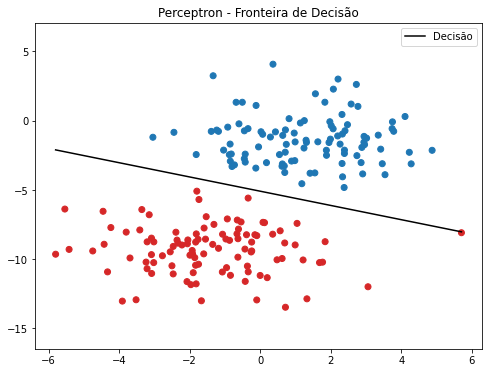

In [14]:
def plot_with_line(X, y):
    # Pontos extremos no eixo x₁
    x1_1 = np.amin(X[:, 0])
    x1_2 = np.amax(X[:, 0])

    # Calcula x₂ correspondente com base na equação da reta:
    # w₀ + w₁·x₁ + w₂·x₂ = 0  ⇒ x₂ = -(w₀ + w₁·x₁)/w₂
    x2_1 = (-p.weights[1] * x1_1 - p.weights[0]) / p.weights[2]
    x2_2 = (-p.weights[1] * x1_2 - p.weights[0]) / p.weights[2]

    # Plota os dados e a reta
    plot_data(X, y)
    plt.plot([x1_1, x1_2], [x2_1, x2_2], "k", label="Decisão")
    x2_min = np.amin(X[:, 1])
    x2_max = np.amax(X[:, 1])
    plt.ylim([x2_min - 3, x2_max + 3])
    plt.legend()

# Exibe gráfico
fig = plt.figure(figsize=(8,6))
plot_with_line(X_train, y_train)
plt.title("Perceptron - Fronteira de Decisão")
plt.show()

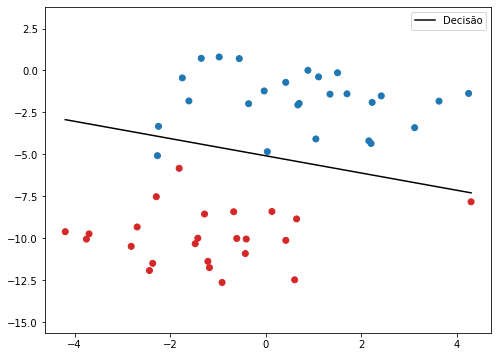

In [15]:
fig = plt.figure( figsize=(8,6) )
plot_with_line( X_test, y_test )

## Exercício:

1- Rode novamente o Perceptron variando o conjunto de dados, o número de épocas e o valor da taxa de aprendizagem.

2- Implemente na classe Perceptron o monitoramento do erro (na amostra de treinamento e/ou uma amostra de validação) a cada época e o critério de parada.

In [18]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000, early_stopping=True):
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = self._unit_step_func
        self.weights = None
        self.errors_ = []  # Lista para armazenar o número de erros por época
        self.early_stopping = early_stopping

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Adiciona a coluna de bias (termo constante)
        X_ = np.c_[np.ones(X.shape[0]), X]

        # Converte rótulos para 0 ou 1
        y_ = np.array([1 if label > 0 else 0 for label in y])

        # Inicializa pesos
        self.weights = np.zeros(X_.shape[1])

        for epoch in range(self.epochs):
            errors = 0

            for idx, x_i in enumerate(X_):
                linear_output = np.dot(x_i, self.weights)
                y_predicted = self.activation_func(linear_output)

                # Regra de atualização
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i

                if update != 0.0:
                    errors += 1

            self.errors_.append(errors)

            if self.early_stopping and (errors == 0 or (epoch > 0 and self.errors_[-1] == self.errors_[-2])):
                print(f"Parando na época {epoch + 1} com {errors} erros.")
                break

    def predict(self, X):
        X_ = np.c_[np.ones(X.shape[0]), X]
        linear_output = np.dot(X_, self.weights)
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [24]:
p = Perceptron(learning_rate=1, epochs=100)
p.fit(X_train, y_train)

Parando na época 14 com 0 erros.


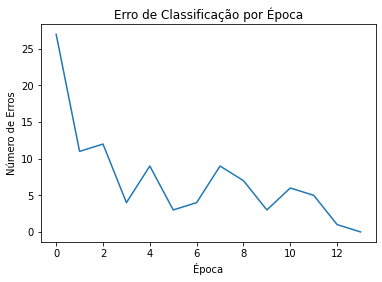

In [25]:
import matplotlib.pyplot as plt

plt.plot(p.errors_)
plt.title("Erro de Classificação por Época")
plt.xlabel("Época")
plt.ylabel("Número de Erros")
plt.show()